In [84]:
import os
os.chdir('C:\\Users\\User\\Documents\\stat2020\\final_project')
os.getcwd()

'C:\\Users\\User\\Documents\\stat2020\\final_project'

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [87]:
orig_df = pd.read_csv("ayutthaya.csv")
orig_df.head()

,Unnamed: 0,b,c,d,e,f,g,h,i,j,...,Life_Insurance,Farm_holding,Births,Population,th_worker,debt,percent_import_us,population,Planted_area,export
0,1995,143862.554,3069,471,70294,2030,254,1566,16137,1392,...,48465,1035310,12317,723.978627,32174.85,7650,80.5,59467274,95.591759,1406310.1
1,1996,171503.917,3305,513,80942,2290,324,5205,19161,1626,...,61572,1043448,12067,727.915763,32324.20,14120,80.6,60130186,91.687820,1411039.3
2,1997,179223.451,4056,474,86917,2697,382,1756,20641,2219,...,74679,1051586,11817,731.831747,32780.45,20590,78.6,60846582,92.229538,1806682.0
3,1998,180611.806,4805,395,84878,3388,420,1166,22362,2306,...,87786,1059724,11567,735.725314,32595.48,69674,80.7,61585103,93.556351,2248089.4
4,1999,189856.706,4030,302,92332,2974,503,1397,22431,2483,...,100893,1067862,11317,739.595172,32910.83,33530,78.7,62298571,97.298302,2214248.7


In [88]:
orig_df.shape

(24, 33)

In [89]:
orig_df.dtypes

Unnamed: 0             int64
b                    float64
c                      int64
d                      int64
e                      int64
f                      int64
g                      int64
h                      int64
i                      int64
j                      int64
k                      int64
l                      int64
m                      int64
n                      int64
o                      int64
p                      int64
q                      int64
r                      int64
s                      int64
t                      int64
u                      int64
JURISTIC_PERSON        int64
Tourism                int64
Life_Insurance         int64
Farm_holding           int64
Births                 int64
Population           float64
th_worker            float64
debt                   int64
percent_import_us    float64
population             int64
Planted_area         float64
export               float64
dtype: object

In [90]:
orig_df.Outlet_Size.unique()

AttributeError: 'DataFrame' object has no attribute 'Outlet_Size'

In [8]:
orig_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
# Original, there 11 features (variables) and 1 output ('Item_Outlet_Sales').
# To increase number of features, we change categorcial data column to numerical data.
# To turn categorcial data column, get_dummies function is used.
# Example: if there exists 1 feature column called gender with 2 values {male, female}, 
#         get_dummies function will converts to 2 columns: gender_male, gender_female (with values 0,1)

# Note that 'Item_Identifier', 'Outlet_Identifier' are IDs; they have too many unique values 
# If we convert these two columns to numerical data, we will get too many resulting columns 
# Hence, we will drop these two columns

df=orig_df.copy()
temp_df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

dummy_df=pd.get_dummies(temp_df)  
dummy_df.columns    
# dummy_df has 35 columns 

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [72]:
dummy_df.Outlet_Size_Medium

0       1
1       1
2       1
3       0
4       0
       ..
8518    0
8519    0
8520    0
8521    1
8522    0
Name: Outlet_Size_Medium, Length: 8523, dtype: uint8

In [10]:
dummy_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [11]:
input_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']
len(input_vars)

35

In [12]:
# Perform regresssion with original 35 independent variables

df = dummy_df.dropna()
X = df[input_vars]
y = df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1083.717949253595, 0.5145832367307764]

# Filter Methods

## Missing Value Ratio

<AxesSubplot:>

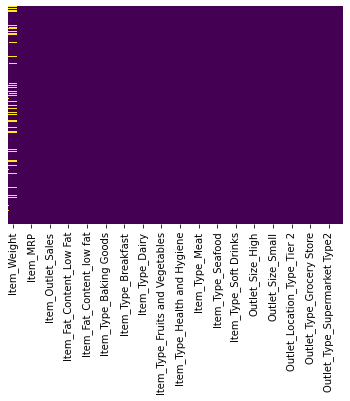

In [13]:
# Use heatmap to visualize missing value (null) positions
df=dummy_df.copy()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Find missing value percent for each variable
null_percent = df.isnull().sum()/len(df)*100
null_percent

Item_Weight                        17.165317
Item_Visibility                     0.000000
Item_MRP                            0.000000
Outlet_Establishment_Year           0.000000
Item_Outlet_Sales                   0.000000
Item_Fat_Content_LF                 0.000000
Item_Fat_Content_Low Fat            0.000000
Item_Fat_Content_Regular            0.000000
Item_Fat_Content_low fat            0.000000
Item_Fat_Content_reg                0.000000
Item_Type_Baking Goods              0.000000
Item_Type_Breads                    0.000000
Item_Type_Breakfast                 0.000000
Item_Type_Canned                    0.000000
Item_Type_Dairy                     0.000000
Item_Type_Frozen Foods              0.000000
Item_Type_Fruits and Vegetables     0.000000
Item_Type_Hard Drinks               0.000000
Item_Type_Health and Hygiene        0.000000
Item_Type_Household                 0.000000
Item_Type_Meat                      0.000000
Item_Type_Others                    0.000000
Item_Type_

In [15]:
# Replace missing values with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)  

In [16]:
# After replacing missing values, re-check %missing data
df.isnull().sum()/len(df)*100

Item_Weight                        0.0
Item_Visibility                    0.0
Item_MRP                           0.0
Outlet_Establishment_Year          0.0
Item_Outlet_Sales                  0.0
Item_Fat_Content_LF                0.0
Item_Fat_Content_Low Fat           0.0
Item_Fat_Content_Regular           0.0
Item_Fat_Content_low fat           0.0
Item_Fat_Content_reg               0.0
Item_Type_Baking Goods             0.0
Item_Type_Breads                   0.0
Item_Type_Breakfast                0.0
Item_Type_Canned                   0.0
Item_Type_Dairy                    0.0
Item_Type_Frozen Foods             0.0
Item_Type_Fruits and Vegetables    0.0
Item_Type_Hard Drinks              0.0
Item_Type_Health and Hygiene       0.0
Item_Type_Household                0.0
Item_Type_Meat                     0.0
Item_Type_Others                   0.0
Item_Type_Seafood                  0.0
Item_Type_Snack Foods              0.0
Item_Type_Soft Drinks              0.0
Item_Type_Starchy Foods  

In [17]:
## Perform regresssion with 35 original independent features
##         where missing values in Item_Weight is replaced with its mean

X = df[input_vars]
y = df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1152.7137914781918, 0.5682526517380435]

In [18]:
# Instead of replacing missing values, let's drop features that have %missing ratios > threshold
# Let's set threshold = acceptable_missing_ratio = 15 (otherwise, Item_Weight will not be dropped if we set higher than this.)

# Below is to get name of features that has %missing values <= acceptable_missing_ratio
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with %missing values <= acceptable_missing_ratio

df = dummy_df.copy()
acceptable_missing_ratio = 15
updated_vars = []
for i in range(0,len(input_vars)):  
    # if %missing value of this feature is less than or at least threshold, keep this feature
    if null_percent[i] <= acceptable_missing_ratio :          
        updated_vars.append(input_vars[i])
updated_vars

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_LF',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Fat_Content_low fat',
 'Item_Fat_Content_reg',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

In [19]:
len(updated_vars) 
# Since one column (Item_weight) has %missing data > 15%, number of features decreases from 35 to 34.

34

In [20]:
## Perform regresssion with 34 independent variables
##         Item_Weight with %missing values above threshold is dropped

X = df[updated_vars]
y = df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1152.5558294091684, 0.5683709725771966]

## Low Variance Filtering

In [21]:
# Compute variance of each feature
df = dummy_df.copy()
df.var()

Item_Weight                        2.156169e+01
Item_Visibility                    2.662335e-03
Item_MRP                           3.878184e+03
Outlet_Establishment_Year          7.008637e+01
Item_Outlet_Sales                  2.912141e+06
Item_Fat_Content_LF                3.570570e-02
Item_Fat_Content_Low Fat           2.406017e-01
Item_Fat_Content_Regular           2.240941e-01
Item_Fat_Content_low fat           1.296975e-02
Item_Fat_Content_reg               1.354070e-02
Item_Type_Baking Goods             7.025732e-02
Item_Type_Breads                   2.858579e-02
Item_Type_Breakfast                1.274118e-02
Item_Type_Canned                   7.035680e-02
Item_Type_Dairy                    7.362441e-02
Item_Type_Frozen Foods             9.035771e-02
Item_Type_Fruits and Vegetables    1.236698e-01
Item_Type_Hard Drinks              2.448096e-02
Item_Type_Health and Hygiene       5.729571e-02
Item_Type_Household                9.538129e-02
Item_Type_Meat                     4.738

In [22]:
# After scanning variances from all features above, set minimum variance threshold = 10 
# Note that minimum variance threshold can be set to any value

# Below is to remove features with low variances
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with variance >= minimum variance threshold

min_var_threshold = 10
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

In [23]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df[updated_vars]
df2['Item_Outlet_Sales']=df.Item_Outlet_Sales
df2.head()

<ipython-input-23-6bc5f28336e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Item_Outlet_Sales']=df.Item_Outlet_Sales


,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,249.8092,1999,3735.1380
1,5.92,48.2692,2009,443.4228
2,17.50,141.6180,1999,2097.2700
3,19.20,182.0950,1998,732.3800
4,8.93,53.8614,1987,994.7052


In [24]:
## Perform regresssion with 3 features with variance >= minimum variance threshold

df2 = df2.dropna()
X = df2[updated_vars]
y = df2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1191.4341205493079, 0.4132916031409223]

## High Correlation Filtering

<AxesSubplot:>

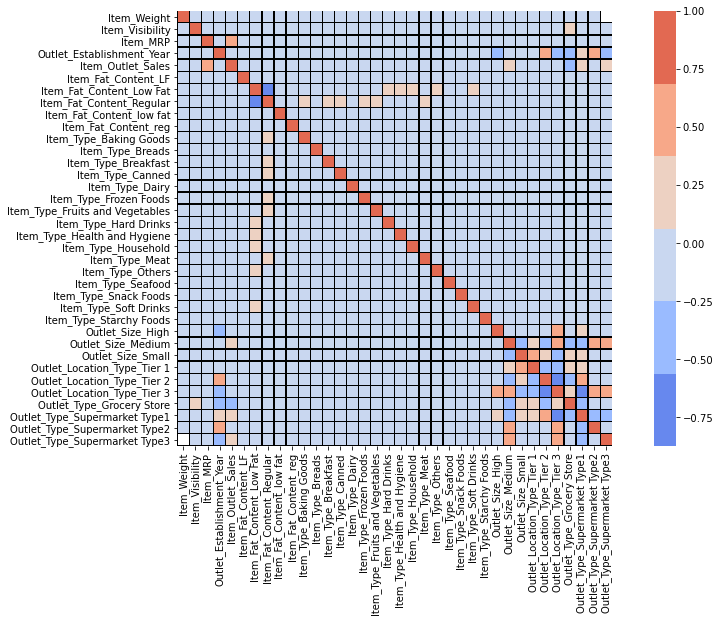

In [25]:
# Plot correlation of numerical data
df = dummy_df.copy()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)

In [26]:
## Perform regresssion with 35 original independent variables

df = df.dropna()
X = df[input_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1083.717949253595, 0.5145832367307764]

In [27]:
df.shape

(7060, 36)

In [28]:
# Look at correlation matrix, 
# since Item_Fat_Content_Low Fat and Item_Fat_Content_Regular are highly correlated, 
# drop one of them

df.drop('Item_Fat_Content_Low Fat', 1, inplace=True)
df.shape

(7060, 35)

In [29]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features without Item_Fat_Content_Low Fat

updated_vars = list(input_vars)
updated_vars.remove('Item_Fat_Content_Low Fat')
len(updated_vars )

34

In [30]:
## Perform regresssion with 34 original independent variables
##         with dropping one of 2 features with high collinearity: 'Item_Fat_Content_Low Fat' & 'Item_Fat_Content_Regular'

df = df.dropna()
X = df[updated_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# After dropping one feature, model performance is improved 
# Using all 35 original features -> [1191.4341205493079, 0.4132916031409223]

[1083.7179492535952, 0.5145832367307763]

In [31]:
# let's try further
# Since Item_MRP is highly correlated with Item_Outlet_Sales, let's drop this Item_MRP and see the performance

df=dummy_df.copy()
df=df.drop('Item_MRP', 1)
df.shape

(8523, 35)

In [32]:
updated_vars = list(input_vars)
updated_vars.remove('Item_MRP')
len(updated_vars)

34

In [33]:
## Perform regresssion with 34 original independent variables
##         with dropping feature with highest correlation with output (Item_MRP)

df = df.dropna()
X = df[updated_vars]
y = df.Item_Outlet_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# As you can see, when high-correlated feature with output is dropped.
#                 the performance drops significantly 

[1462.4503765716695, 0.11601577614344105]

# Wrapper Methods

## Forward Feature Selection

In [34]:
df = dummy_df.copy()
df = df.dropna()

In [35]:
# f_regression receives input features and output
#              and returns f-statistic and p-value for f-test 
# f-test is to used to test whether model fits data well or not 
# the more f-statistic (the lower p-value), the better

from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df.Item_Outlet_Sales)
fstat

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


array([1.40801139e+00, 5.17726426e+01, 4.42949850e+03, 1.05270137e+00,
       4.73737889e-01, 1.53048394e+00, 2.87487926e+00, 1.12955167e-01,
       7.08267222e-01, 1.00953589e+01, 6.66144894e-02, 5.28795049e-01,
       1.51576271e-01, 1.65350855e+00, 4.79364717e-01, 1.82084710e+00,
       2.70135119e-01, 6.06147692e+00, 1.63299561e+00, 8.08182049e-01,
       3.02152629e-01, 3.59052486e+00, 5.09223712e+00, 3.82146340e+00,
       2.19151420e+00, 1.48846800e+01, 3.06910857e+00, 6.22478459e+01,
       4.08450057e+01, 8.34541509e+01, 2.41254345e+02, 9.16088886e+02,
       4.69929630e+02, 6.89430147e+00,            nan])

In [36]:
pval

array([2.35426734e-001, 6.87372157e-013, 0.00000000e+000, 3.04920919e-001,
       4.91295193e-001, 2.16080987e-001, 9.00158283e-002, 7.36814472e-001,
       4.00048166e-001, 1.49284058e-003, 7.96338932e-001, 4.67138005e-001,
       6.97045291e-001, 1.98524254e-001, 4.88732992e-001, 1.77255759e-001,
       6.03257447e-001, 1.38399386e-002, 2.01331240e-001, 3.68688943e-001,
       5.82553445e-001, 5.81507175e-002, 2.40636304e-002, 5.06394445e-002,
       1.38817467e-001, 1.15305300e-004, 7.98366420e-002, 3.48629714e-015,
       1.75285668e-010, 8.37835967e-020, 1.59935589e-053, 2.58247199e-189,
       6.14504046e-101, 8.66575302e-003,             nan])

In [37]:
# Set threshold to select subset of features based on f-test statistic

# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from f-test statistic from forward feature selection

f_value_threshold = 10  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Item_Visibility',
 'Item_MRP',
 'Item_Type_Baking Goods',
 'Outlet_Size_High',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1']

In [38]:
## Perform regresssion with 12 features selected from f-test statistic from forward feature selection

X = df[updated_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1081.9408160768337, 0.5161739512286574]

## Recursive Feature Elimination

In [39]:
df = dummy_df.copy()
df = df.dropna()

In [40]:
# RFE receives fit model and number of features to select (which can be adjusted)
# rfe receives input features and output 

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Item_Outlet_Sales']
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [41]:
# rfe masks features that are selected as 1
model.ranking_

array([25,  1, 18, 13, 20, 17,  9, 14,  8, 24,  7, 15, 21,  5, 11,  6, 23,
       19,  3, 10, 22,  1,  4, 12,  1,  1,  1,  2,  1, 16,  1,  1,  1,  1,
       26])

In [42]:
# to obtain coefficients of features in regression model
model.estimator_.coef_

array([-3.29072595e+02,  4.27738138e+02,  1.75729557e+02, -2.69275892e+16,
        1.31540317e+01, -5.92560087e+00,  2.69275892e+16,  1.67096540e+16,
        4.36372432e+16,  1.67096540e+16])

In [43]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from recursive feature elimination

updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Item_Visibility',
 'Item_Type_Seafood',
 'Item_Type_Starchy Foods',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

In [44]:
## Perform regresssion with features selected from recursive feature elimination

X = df[updated_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# R2 using features selected from rfe is quite low
# With this data, about 27 features need to be selected to get R2 > 0.5

[1462.367574579448, 0.11611587332811157]

In [45]:
# If you don't need to know which features get selected from rfe, 
#     you can use result model to predict immediately

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([2404., 2188., 2460., ..., 2508., 2396., 2460.])

# Embedded Methods

## Regression & Lasso (L1)

In [46]:
df = dummy_df.copy()
df = df.dropna()
X = df[input_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [47]:
# Perform regresssion with original 35 independent variables

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1083.717949253595, 0.5145832367307764]

In [48]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=1)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1082.5624029730438, 0.5156178647649798]

In [49]:
## We can look at values of coefficients of regression model 

[model.coef_, model.intercept_]

[array([-1.90563124e+00, -0.00000000e+00,  1.51080980e+01,  3.08212395e+01,
         0.00000000e+00, -0.00000000e+00,  6.46424508e+01, -0.00000000e+00,
        -3.13611903e+01,  5.16649679e+01,  2.73025025e+01, -3.92578756e+01,
         1.03260533e+01, -4.94912936e+01, -9.08956408e-01,  0.00000000e+00,
         0.00000000e+00, -4.74641601e+01, -3.49649363e+01, -3.61272259e+00,
        -0.00000000e+00,  1.23247441e+02,  0.00000000e+00, -7.52909703e+01,
         5.23745277e+00,  5.32235485e+02,  1.76824378e+02,  1.29133885e+02,
         5.40082274e+01, -0.00000000e+00, -0.00000000e+00, -1.13980903e+03,
         6.48195356e+02,  0.00000000e+00,  0.00000000e+00]),
 -62250.50190928942]

In [50]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max
##  Note that argsort returns indices of array after sort
##  At the end, coef array = non-zero coeffients, sorted from min to max
##              update_vars = names of features corresponding to coef array

index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-1139.8090281090085,
 -75.29097030722713,
 -49.49129356658432,
 -47.46416007294433,
 -39.257875554121,
 -34.96493634505267,
 -31.361190301160605,
 -3.6127225919352908,
 -1.9056312361262164,
 -0.9089564082745099,
 5.237452773545607,
 10.326053279710043,
 15.108098037774546,
 27.302502540299038,
 30.82123947561275,
 51.66496787516068,
 54.00822737528953,
 64.64245077675201,
 123.24744093283738,
 129.1338848180378,
 176.82437825826457,
 532.2354848350878,
 648.1953559829699]

In [51]:
update_vars

['Outlet_Type_Grocery Store',
 'Item_Type_Soft Drinks',
 'Item_Type_Dairy',
 'Item_Type_Health and Hygiene',
 'Item_Type_Breakfast',
 'Item_Type_Household',
 'Item_Fat_Content_reg',
 'Item_Type_Meat',
 'Item_Weight',
 'Item_Type_Frozen Foods',
 'Item_Type_Starchy Foods',
 'Item_Type_Canned',
 'Item_MRP',
 'Item_Type_Breads',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Location_Type_Tier 1',
 'Item_Fat_Content_Regular',
 'Item_Type_Seafood',
 'Outlet_Size_Small',
 'Outlet_Size_Medium',
 'Outlet_Size_High',
 'Outlet_Type_Supermarket Type1']

In [52]:
## Find out how many features have left after performing lasso with alpha = 1

len(update_vars)

23

In [53]:
## Run another regression with lasso + alpha = 10

lasso2 = Lasso(alpha=10)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[1082.5624029730438, 0.5173686622710774]

In [54]:
[model2.coef_, model2.intercept_]

[array([   -1.53062714,    -0.        ,    15.07341358,     4.61762831,
            0.        ,    -0.        ,    42.34463538,    -0.        ,
           -0.        ,     0.        ,     0.        ,    -0.        ,
            0.        ,    -0.        ,     0.        ,     0.        ,
            0.        ,    -0.        ,    -0.        ,    -0.        ,
           -0.        ,     0.        ,     0.        ,    -0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,    -0.        , -1489.09807865,
          385.58189819,    -0.        ,     0.        ]),
 -9432.323929413473]

In [55]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max

index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[-1489.0980786504665,
 -1.5306271408161114,
 4.617628310282371,
 15.073413584885826,
 42.34463538126837,
 385.5818981940784]

In [56]:
update_vars2

['Outlet_Type_Grocery Store',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Item_MRP',
 'Item_Fat_Content_Regular',
 'Outlet_Type_Supermarket Type1']

In [57]:
## Find out how many features have left after performing lasso with alpha = 10

len(update_vars2)

## Since we use larger alpha, the penalty term has more weight.
## More coefficients of regression model will be zero. 

6

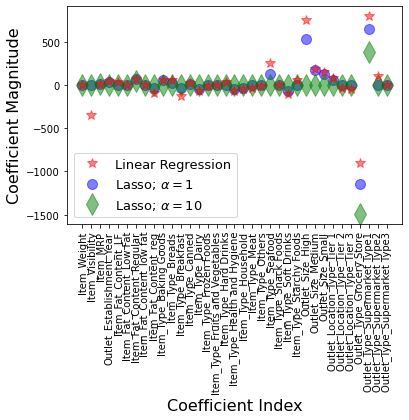

In [58]:
## Plot coefficients of linear regression model, regression with lasso + alpha=1,  regression with lasso + alpha=10
## Note that alpha parameter in plot indicates transparency of marker (it has nothing to do with alpha in lasso)

plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Regression & Ridge (L2)

In [59]:
from sklearn.linear_model import Ridge

## Perform regresssion with ridge 
## set alpha (weight of penalty term) = 1

X = df[input_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

ridge = Ridge(alpha=1.0)
model = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1083.6308861602527, 0.514661227849027]

In [60]:
[model.coef_, model.intercept_]

[array([-1.89507054e+00, -3.25463141e+02,  1.51064634e+01,  4.10471092e+01,
         2.84346031e+01,  2.17582491e+00,  6.89119507e+01, -5.73812214e+00,
        -9.37842567e+01,  6.18979923e+01,  5.77191027e+01, -1.29925248e+02,
         2.06894176e+01, -6.49952637e+01, -1.66525632e+01,  2.56276936e+00,
         3.30382807e+01, -7.27113217e+01, -5.09960720e+01, -2.97973142e+01,
        -9.99581725e+00,  2.45465529e+02,  1.51026198e-01, -1.00050996e+02,
         5.36004788e+01,  7.41216524e+02,  1.83864256e+02,  1.48448422e+02,
         8.39541165e+01, -3.43275086e+01, -4.96266080e+01, -9.04150306e+02,
         7.90843132e+02,  1.13307173e+02,  0.00000000e+00]),
 -82842.87776718172]

In [61]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max
##  Note that argsort returns indices of array after sort
##  At the end, coef array = non-zero coeffients, sorted from min to max
##              update_vars = names of features corresponding to coef array

index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-904.1503057285664,
 -325.4631407164704,
 -129.92524838052648,
 -100.05099593895282,
 -93.78425665470887,
 -72.71132173401419,
 -64.99526370516404,
 -50.99607197488935,
 -49.626607959451924,
 -34.32750857992835,
 -29.797314222799926,
 -16.652563196159427,
 -9.995817247949212,
 -5.738122139691543,
 -1.8950705449846597,
 0.151026198448129,
 2.175824914758962,
 2.562769360671472,
 15.106463431846096,
 20.68941755708333,
 28.434603133705757,
 33.038280710480926,
 41.047109169928376,
 53.600478804446446,
 57.71910267894345,
 61.89799234558082,
 68.91195074501296,
 83.95411653519342,
 113.307173470601,
 148.44842194609345,
 183.86425582954405,
 245.46552873943688,
 741.2165242967309,
 790.843132266006]

In [62]:
update_vars

['Outlet_Type_Grocery Store',
 'Item_Visibility',
 'Item_Type_Breakfast',
 'Item_Type_Soft Drinks',
 'Item_Fat_Content_reg',
 'Item_Type_Health and Hygiene',
 'Item_Type_Dairy',
 'Item_Type_Household',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Location_Type_Tier 2',
 'Item_Type_Meat',
 'Item_Type_Frozen Foods',
 'Item_Type_Others',
 'Item_Fat_Content_low fat',
 'Item_Weight',
 'Item_Type_Snack Foods',
 'Item_Fat_Content_Low Fat',
 'Item_Type_Fruits and Vegetables',
 'Item_MRP',
 'Item_Type_Canned',
 'Item_Fat_Content_LF',
 'Item_Type_Hard Drinks',
 'Outlet_Establishment_Year',
 'Item_Type_Starchy Foods',
 'Item_Type_Breads',
 'Item_Type_Baking Goods',
 'Item_Fat_Content_Regular',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Size_Small',
 'Outlet_Size_Medium',
 'Item_Type_Seafood',
 'Outlet_Size_High',
 'Outlet_Type_Supermarket Type1']

In [63]:
## Find out how many features have left after performing ridge with alpha = 1

len(update_vars)

34

In [64]:
## Run another regression with ridge + alpha = 10

ridge = Ridge(alpha=10)
model2 = ridge.fit(X_train, y_train)
y_pred = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1083.0952192882396, 0.5151409403560399]

In [65]:
[model2.coef_, model2.intercept_]

[array([-1.86584819e+00, -1.99881878e+02,  1.51053544e+01,  3.47213969e+01,
         2.54122646e+01,  4.81851619e-02,  6.67997573e+01, -5.90337963e+00,
        -8.63568275e+01,  6.19844716e+01,  5.57273003e+01, -1.10857017e+02,
         2.21417577e+01, -6.16851401e+01, -1.33189191e+01,  4.11228867e+00,
         3.24032633e+01, -6.66920927e+01, -4.72985557e+01, -2.65337243e+01,
        -7.87384024e+00,  1.99341198e+02,  2.26886238e+00, -9.40008261e+01,
         5.02809733e+01,  6.79373826e+02,  1.91108051e+02,  1.43351041e+02,
         7.48003504e+01, -2.41510739e-01, -7.45588397e+01, -9.07637001e+02,
         7.53932666e+02,  1.53704335e+02,  0.00000000e+00]),
 -70167.61268743643]

In [66]:
len(update_vars2)

## Using ridge with alpha = 10 gives number of features = 34, like using alpha = 1
## Hence, regression with ridge model does not help with feature selection much

6

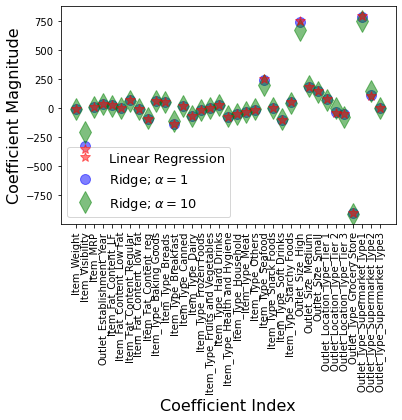

In [67]:
## Plot coefficients of linear regression model, regression with ridge + alpha=1,  regression with ridge + alpha=10
## Note that alpha parameter in plot indicates transparency of marker (it has nothing to do with alpha in ridge)

plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Random Forest

In [68]:
df = dummy_df.copy()
df = df.dropna()

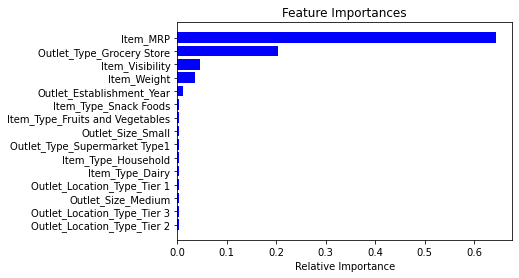

In [69]:
# RandomForestRegressor receives parameters for random forest such as depth of tree, number of trees

# n_features = number of selected features

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.Item_Outlet_Sales)

n_features = 15

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Choose features with large feature importance

In [70]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of 15 features selected from feature importance of random forest
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['Item_MRP',
 'Outlet_Type_Grocery Store',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Item_Type_Snack Foods',
 'Item_Type_Fruits and Vegetables',
 'Outlet_Size_Small',
 'Outlet_Type_Supermarket Type1',
 'Item_Type_Household',
 'Item_Type_Dairy',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Size_Medium',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Location_Type_Tier 2']

In [71]:
## Perform regresssion with features selected from feature importance of random forest

X = df[updated_vars]
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[1081.3122537720042, 0.516735953276918]